In [1]:
import tensorflow as tf
tf.__version__


'1.11.0-dev20180905'

In [2]:
tf.keras.__version__

'2.1.6-tf'

In [3]:
#Loading MNIST dataset
mnist=tf.keras.datasets.mnist

In [4]:
#Splitting into training and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
#This what the 111th picture in the dataset looks like,pixel data(RGB values)
print(x_train[110])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  21 133 254 254  61   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   4  81 226 253 253 253 228  44
   50   7   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 149 253 253 215 111 20

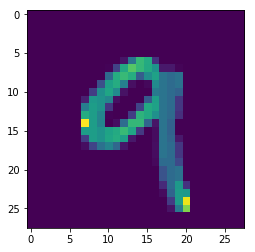

In [9]:
#Displaying what the 111th image is 
import matplotlib.pyplot as plt 
plt.imshow(x_train[110]) 
plt.show()

In [10]:
#Normalising the pixel data(inputs) to the neural networks
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
print(x_train[110])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

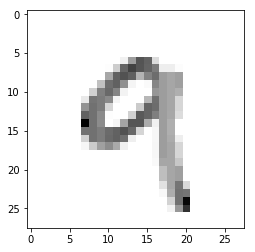

In [11]:
#The Normalized 111th image
plt.imshow(x_train[110],cmap=plt.cm.binary)
plt.show()

In [ ]:
#This is where the magic occurs a.k.a THE NEURAL NETWORK
#1 input layer,2 hidden layers,1 output layer
#Training on the training dataset
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 9s 154us/step - loss: 0.2649 - acc: 0.9218
Epoch 2/3
55232/60000 [==========================>...] - ETA: 0s - loss: 0.1076 - acc: 0.9664

In [ ]:
#Printing the evalution metrics on the test dataset
val_loss,val_acc=model.evaluate(x_test,y_test)
print("Loss :",val_loss)
print("Accuracy :",val_acc)

In [ ]:
#Making predictions from the trained model
predictions=model.predict(x_test) 


In [ ]:
#Doesn't make sense right?
print(predictions)

In [ ]:
#Making sense of the prediction made
import numpy as np
print(np.argmax([predictions[176]]))

#You can change the 176 given in this cell ,to any number in between 0-9999 and see predictions made


In [ ]:
#Give the same number in this cell,to show the actual image on which the prediction was made
plt.imshow(x_test[176])
plt.show()